### **Restaurant rating prediction case study in python**

Zomato, the online food app, has reached out to you to help them to predict how good or bad a restaurant will turn out in the future. So that, they can take a decision to include the restaurant in their app or remove it.

They have shared the data of 9551 restaurants from all over the world which are currently present in the Zomato App. It contains the details about the restaurants and what rating it achieved finally.

**Aim-** The task is to create a machine learning model which can predict the Rating of a restaurant based on its characteristics.

In below case study I will discuss the step by step approach to create a Machine Learning predictive model in such scenarios.

The flow of the case study is as below:

* Reading the data in python
* Defining the problem statement
* Identifying the Target variable
* Looking at the distribution of Target variable
* Basic Data exploration
* Feature Engineering
* Rejecting unnecessary columns
* Visual Exploratory Data Analysis for data distribution (Histogram and Barcharts)
* Feature Selection based on data distribution
* Outlier treatment
* Missing Values treatment
* Visual correlation analysis
* Statistical correlation analysis (Feature Selection)
* Converting data to numeric for ML
* Sampling and K-fold cross validation
* Trying multiple Regression algorithms
* Selecting the best Model
* Deploying the best model in production

In [88]:
# Data manipulation liabraries
import pandas as pd
import numpy as np

# Data visualization liabraries
import matplotlib.pyplot as plt
import seaborn as sns

# Importing model building liabraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [89]:
# Loading the data
data = pd.read_csv('C:/Users/user/Desktop/Projects/ML_Sarang/ZomatoData.csv', encoding='latin-1')
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Votes,Average Cost for two,Rating
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",Botswana Pula(P),Yes,No,No,No,3,314,1100,4.8
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,Botswana Pula(P),Yes,No,No,No,3,591,1200,4.5
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",Botswana Pula(P),Yes,No,No,No,4,270,4000,4.4
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",Botswana Pula(P),No,No,No,No,4,365,1500,4.9
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",Botswana Pula(P),Yes,No,No,No,4,229,1500,4.8


# Reading the data into python

This is one of the most important steps in machine learning! You must understand the data and the domain well before trying to apply any machine learning algorithm.

### Data description

The business meaning of each column in the data is as below

* **Restaurant ID:** The id for each restaurant
* **Restaurant Name:** The brand/restaurant name
* **Country Code:** In which country the restaurant is operating
* **City:** In which city the restaurant is operating
* **Address:** What is the address of the restaurant
* **Locality:** What is the locality of the restaurant
* **Locality Verbose:** Detailed locality description
* **Longitude:** GPS longitude location
* **Latitude:** GPS latitude location
* **Cuisines:** Various type of food offered
* **Currency:** The business currency
* **Has Table booking:** Is advance table booking facility available?
* **Has Online delivery:** Does they take online food orders?
* **Is delivering now:** It is open now?
* **Switch to order menu:** Whether switch to order menu is available?
* **Price range:** The price range of the restaurant
* **Votes:** The number of people who voted for the rating
* **Average Cost for two:** The typical cost for two people
* **Rating:** The final rating of the restaurant

In [90]:
# Checking shape 
data.shape

(9551, 19)

# Missing Value Treatment

Missing values are treated for each column separately.

If a column has more than 30% data missing, then missing value treatment cannot be done. That column must be rejected because too much information is missing.

There are below options for treating missing values in data.

* Delete the missing value rows if there are only few records
* Impute the missing values with MEDIAN value for continuous variables
* Impute the missing values with MODE value for categorical variables
* Interpolate the values based on nearby values
* Interpolate the values based on business logic

In [91]:
# Checking for null values 
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Votes                   0
Average Cost for two    0
Rating                  0
dtype: int64

- No missing values in this dataset.

In [92]:
# Data exploration
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Currency              9551 non-null   object 
 11  Has Table booking     9551 non-null   object 
 12  Has Online delivery   9551 non-null   object 
 13  Is delivering now     9551 non-null   object 
 14  Switch to order menu  9551 non-null   object 
 15  Price range          

In [93]:
# Checking for duplicate values
data.duplicated().sum()

0

# Define the problem statement

Create a Predictive model which can predict the future Rating of a restaurant
* Target Variable: Rating
* Predictors: location, menu, cost etc.

* Rating=1 Worst
* Rating=5 Best

- Based on the problem statement you can understand that we need to create a **supervised ML Regression model**, as the target variable is Continuous.

# Looking at the distribution of Target variable

* If target variable's distribution is too skewed then the predictive modeling will not be possible.
* Bell curve is desirable but slightly positive skew or negative skew is also fine
* When performing Regression, make sure the histogram looks like a bell curve or slight skewed version of it. Otherwise it impacts the Machine Learning algorithms ability to learn all the scenarios.

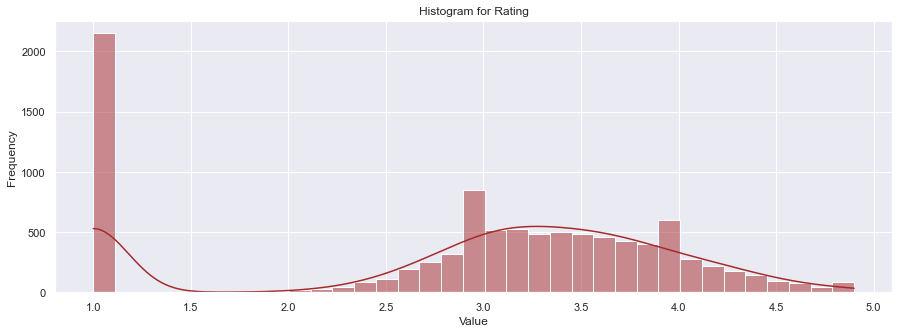

In [94]:
# Histogram for traget variable

plt.figure(figsize=(15,5))
sns.set(style='darkgrid')
sns.histplot(data['Rating'],kde=True,color='brown')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram for Rating')
plt.show()

- The data distribution of the target variable is satisfactory to proceed further. There are sufficient number of rows for each type of values to learn from.

# Basic Data Exploration

This step is performed to guage the overall data. The volume of data, the types of columns present in the data. Initial assessment of the data should be done to identify which columns are Quantitative, Categorical or Qualitative.

This step helps to start the column rejection process. You must look at each column carefully and ask, does this column affect the values of the Target variable? For example in this case study, you will ask, does this column affect the rating of the Restaurant? If the answer is a clear "No", then remove the column immediately from the data, otherwise keep the column for further analysis.

There are four commands which are used for Basic data exploration in Python

* **describe()** : This provides the descriptive statistical details of the data
* **nunique()** : This helps us to identify if a column is categorical or continuous

In [95]:
#  Looking at the descriptive statistics of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Restaurant ID,9551.0,9.051128e+06,8.791521e+06,53.000000,301962.500000,6.004089e+06,1.835229e+07,1.850065e+07
Country Code,9551.0,1.836562e+01,5.675055e+01,1.000000,1.000000,1.000000e+00,1.000000e+00,2.160000e+02
Longitude,9551.0,6.412657e+01,4.146706e+01,-157.948486,77.081343,7.719196e+01,7.728201e+01,1.748321e+02
Latitude,9551.0,2.585438e+01,1.100794e+01,-41.330428,28.478713,2.857047e+01,2.864276e+01,5.597698e+01
Price range,9551.0,1.804837e+00,9.056088e-01,1.000000,1.000000,2.000000e+00,2.000000e+00,4.000000e+00
Votes,9551.0,1.569097e+02,4.301691e+02,0.000000,5.000000,3.100000e+01,1.310000e+02,1.093400e+04
Average Cost for two,9551.0,1.199211e+03,1.612118e+04,0.000000,250.000000,4.000000e+02,7.000000e+02,8.000000e+05
Rating,9551.0,2.891268e+00,1.128845e+00,1.000000,2.500000,3.200000e+00,3.700000e+00,4.900000e+00


In [96]:
# Looking for unique values
data.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Votes                   1012
Average Cost for two     140
Rating                    33
dtype: int64

### Basic Data Exploration Results

Based on the basic exploration above, you can now create a simple report of the data, noting down your observations regaring each column. Hence, creating a initial roadmap for further analysis.

The selected columns in this step are not final, further study will be done and then a final list will be created

* Restaurant ID: Qualitative. Rejected.
* Restaurant Name: Qualitative. Rejected.
* Country Code: Categorical. Selected.
* City: Categorical. Rejected. Too many unique levels, hence it will cause high dimensionality
* Address: Qualitative. Rejected.
* Locality: Qualitative. Rejected.
* Locality Verbose: Qualitative. Rejected.
* Longitude: Continuous. Selected. This represents the location of restaurant
* Latitude: Continuous. Selected. This represents the location of restaurant
* Cuisines: Qualitative. Rejected. A new feature can be engineered from it.
* Currency: Categorical. Selected.
* Has Table booking: Categorical. Selected.
* Has Online delivery: Categorical. Selected.
* Is delivering now: Categorical. Selected.
* Switch to order menu: Categorical. Selected.
* Price range: Categorical. Selected.
* Votes: Continuous. Selected.
* Average Cost for two: Continuous. Selected.
* Rating: Continuous. Selected. This is the Target Variable!

# Feature Engineering

Some of the columns cannot be used directly for machine learning like Dates, addresses, etc. because these are qualitative in nature. Hence every row has a different string value, Hence the ML algorithms cannot learn anything from them because each row has a different description. In simple terms, no general rules can be created from such columns.

However, we can extract some information from these columns, which can be used in ML. Like from a date column we can take out month, week, quarter etc, which becomes categorical feature.

Similarly we can extract some repetitive information from address like zip codes, locality etc. however if the number of unique values is too high in them (more than 50) then it creates trouble later for the ML algorithm as the data dimensionality increases while converting such columns to dummy variables.

In this data the "Cuisines" column cannot be used directly because it will generate 1825 dummy variables!! Hence, we can count the number of cuisines offered, which can be a number, hence it can be used in ML.

In [97]:
# Function to count the number of cuisines
def Count(inp):
    CCount=len(str(inp).split(','))
    return(CCount)


In [98]:
# Creating a new feature in data
# We will further explore the new feature just like other features
data['CuisineCount'] = data['Cuisines'].apply(Count)

In [99]:
# Removing unnecessary columns
unnecessary = ['Restaurant ID','Restaurant Name','City','Address','Locality','Locality Verbose','Cuisines']

data = data.drop(unnecessary, axis=1)
data.head()

,Country Code,Longitude,Latitude,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Votes,Average Cost for two,Rating,CuisineCount
0,162,121.027535,14.565443,Botswana Pula(P),Yes,No,No,No,3,314,1100,4.8,3
1,162,121.014101,14.553708,Botswana Pula(P),Yes,No,No,No,3,591,1200,4.5,1
2,162,121.056831,14.581404,Botswana Pula(P),Yes,No,No,No,4,270,4000,4.4,4
3,162,121.056475,14.585318,Botswana Pula(P),No,No,No,No,4,365,1500,4.9,2
4,162,121.057508,14.584450,Botswana Pula(P),Yes,No,No,No,4,229,1500,4.8,2


## Visual Exploratory Data Analysis

* Categorical variables: Bar plot
* Continuous variables: Histogram

Visualize distribution of all the Categorical Predictor variables in the data using bar plots
We can spot a categorical variable in the data by looking at the unique values in them. Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values.

Based on the Basic Data Exploration above, we have spotted seven categorical predictors in the data

**Categorical Predictors:** 'Country Code', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu','Price range'

We use bar charts to see how the data is distributed for these categorical columns.

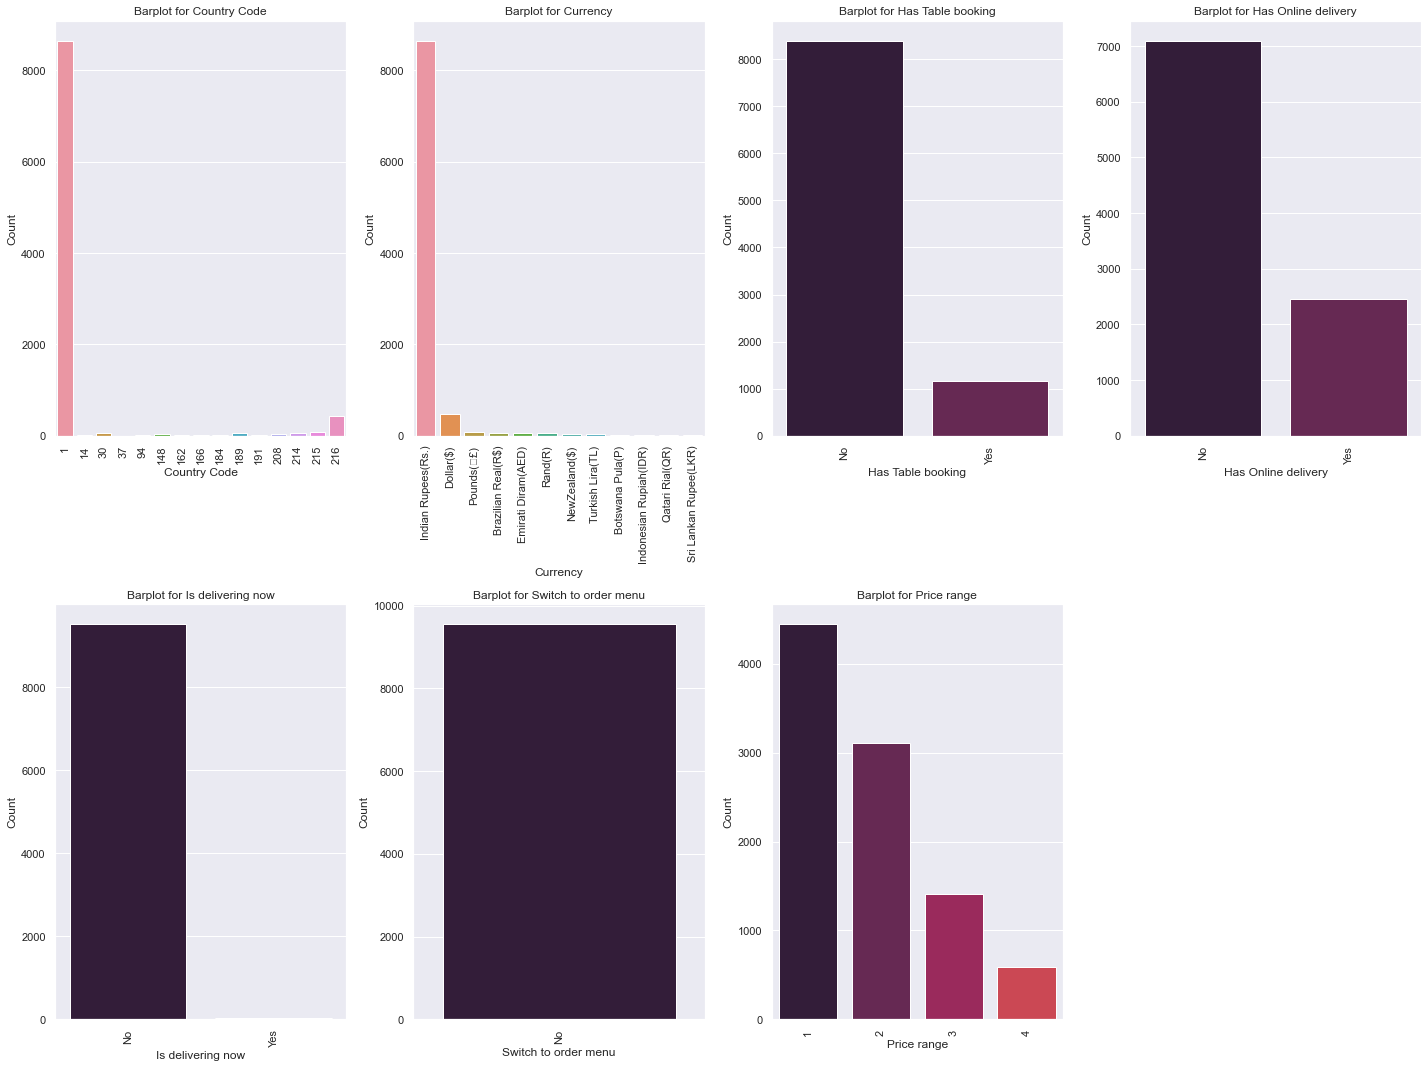

In [100]:
CatCols=[
    'Country Code', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now',
    'Switch to order menu','Price range']

sns.set_palette("rocket")
# Define the number of rows and columns for the subplots
num_rows = 2  
num_cols = len(CatCols) // num_rows + (len(CatCols) % num_rows)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

for i, col in enumerate(CatCols):
    ax = axes[i] if i < len(CatCols) else None
    if ax is not None:
        sns.barplot(x=data[col].value_counts().index, y=data[col].value_counts(), ax=ax)
        ax.set_title(f'Barplot for {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Count')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


# Remove any empty subplots
for i in range(len(CatCols), num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

### Bar Charts Interpretation

These bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.

In the ideal bar chart each category has comparable frequency. Hence, there are enough rows for each category in the data for the ML algorithm to learn.

If there is a column which shows too skewed distribution where there is only one dominant bar and the other categories are present in very low numbers. These kind of columns may not be very helpful in machine learning. We confirm this in the correlation analysis section and take a final call to select or reject the column.

In this data, "Country Code", "Currency", "is delivering now" and "Switch to order menu" are too skewed. There is just one bar which is dominating and other categories have very less rows or there is just one value only. Such columns are not correlated with the target variable because there is no information to learn. The algorithms cannot find any rule like when the value is this then the target variable is that.

**Selected Categorical Variables:** Only three categorical variables are selected for further analysis.

'Has Table booking', 'Has Online delivery', 'Price range'

## Visualize distribution of all the Continuous Predictor variables in the data using histograms

Based on the Basic Data Exploration, There are four continuous predictor variables ''Longitude', 'Latitude','Votes', and 'Average Cost for two'

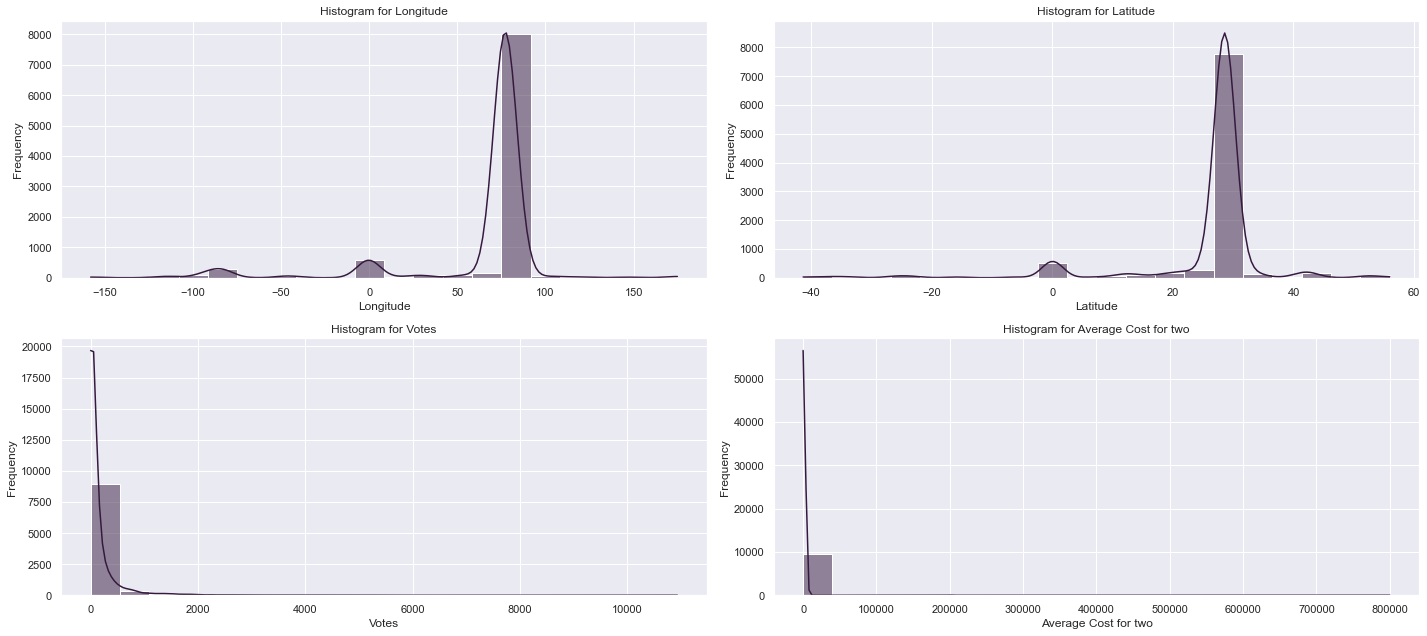

In [101]:
ConCols=['Longitude','Latitude','Votes','Average Cost for two']

# Create subplots for histograms
sns.set_palette("rocket")
fig, axes = plt.subplots(2, 2, figsize=(20, 9))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

for i, col in enumerate(ConCols):
    sns.histplot(data=data, x=col, kde=True, ax=axes[i], bins=20)
    axes[i].set_title(f'Histogram for {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Histogram Interpretation

Histograms shows us the data distribution for a single continuous variable.

The X-axis shows the range of values and Y-axis represent the number of values in that range. For example, in the above histogram of "Votes", there are around 9000 rows in data that has a vote value between 0 to 1000.

The ideal outcome for histogram is a bell curve or slightly skewed bell curve. If there is too much skewness, then outlier treatment should be done and the column should be re-examined, if that also does not solve the problem then only reject the column.

**Selected Continuous Variables:**

* Longitude : Selected. The distribution is good.
* Latitude: Selected. The distribution is good.
* Votes: Selected. Outliers seen beyond 300000, need to treat them.
* Average Cost for two: Selected. Outliers seen beyond 4000, need to treat them.

# Outliers Treatement

Outliers are extreme values in the data which are far away from most of the values. You can see them as the tails in the histogram.

Outlier must be treated one column at a time. As the treatment will be slightly different for each column.

**Why I should treat the outliers?**

Outliers bias the training of machine learning models. As the algorithm tries to fit the extreme value, it goes away from majority of the data.

There are below two options to treat outliers in the data.

* Option-1: Delete the outlier Records. Only if there are just few rows lost.
* Option-2: Impute the outlier values with a logical business value

Below we are finding out the most logical value to be replaced in place of outliers by looking at the histogram.

### Replacing outliers 

In [102]:
# Replacing outliers for votes column
data['Votes'][data['Votes']<4000].sort_values(ascending=False)

7863    3986
821     3848
3992    3697
3119    3591
1861    3569
        ... 
4801       0
4803       0
4805       0
4807       0
4784       0
Name: Votes, Length: 9532, dtype: int64

- Above result shows the nearest logical value is 3986, hence, replacing any value above 4000 with it.

In [103]:
data['Votes'][data['Votes']>4000]=3986

In [104]:
# Replacing outliers for Average Cost for two column
data['Average Cost for two'][data['Average Cost for two']<50000].sort_values(ascending=False)

7543    8000
4088    7000
4087    6500
7494    6000
7538    6000
        ... 
85         0
87         0
240        0
397        0
9242       0
Name: Average Cost for two, Length: 9530, dtype: int64

In [105]:
data['Average Cost for two'][data['Average Cost for two']>50000]=8000

### Visualizing distribution after outlier treatment

The distribution has improved after the outlier treatment. There is still a tail but it is thick, that means there are many values in that range, hence, it is acceptable.

array([[<AxesSubplot:title={'center':'Average Cost for two'}>,
        <AxesSubplot:title={'center':'Votes'}>]], dtype=object)

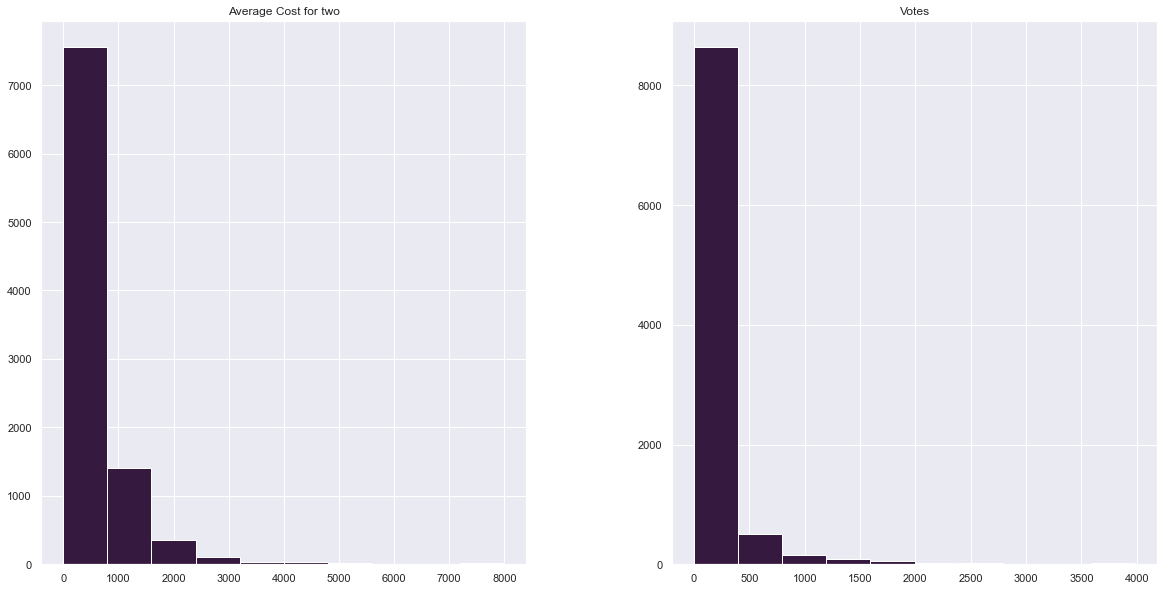

In [106]:
Col=['Average Cost for two','Votes']
data[Col].hist(figsize=(20,10))

# Feature Selection

Now its time to finally choose the best columns(Features) which are correlated to the Target variable. This can be done directly by measuring the correlation values or ANOVA/Chi-Square tests. However, it is always helpful to visualize the relation between the Target variable and each of the predictors to get a better sense of data.

I have listed below the techniques used for visualizing relationship between two variables as well as measuring the strength statistically.

### Visual exploration of relationship between variables
* Continuous Vs Continuous ---- Scatter Plot
* Categorical Vs Continuous---- Box Plot
* Categorical Vs Categorical---- Grouped Bar Plots

### Statistical measurement of relationship strength between variables
* Continuous Vs Continuous ---- Correlation matrix
* Categorical Vs Continuous---- ANOVA test
* Categorical Vs Categorical--- Chi-Square test

In this case study the Target variable is Continuous, hence below two scenarios will be present

* Continuous Target Variable Vs Continuous Predictor
* Continuous Target Variable Vs Categorical Predictor

### Relationship exploration: Continuous Vs Continuous -- Scatter Charts

When the Target variable is continuous and the predictor is also continuous, we can visualize the relationship between the two variables using scatter plot and measure the strength of relation using pearson's correlation value.

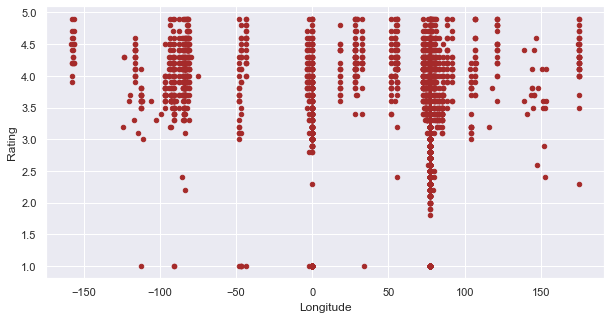

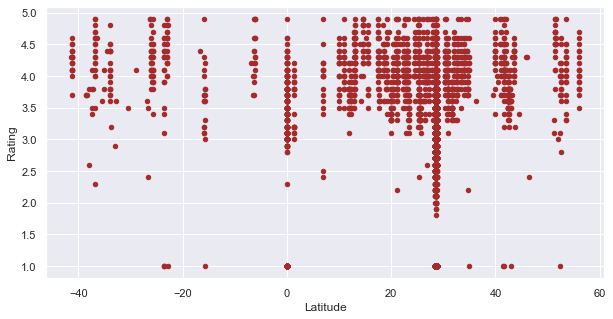

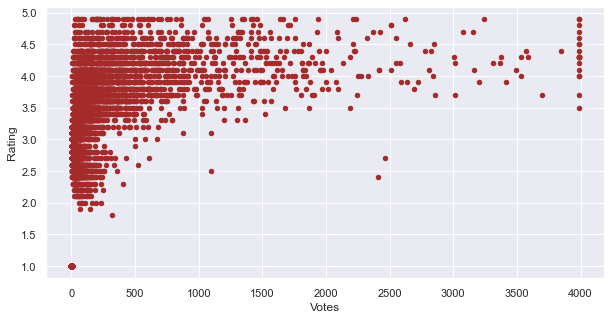

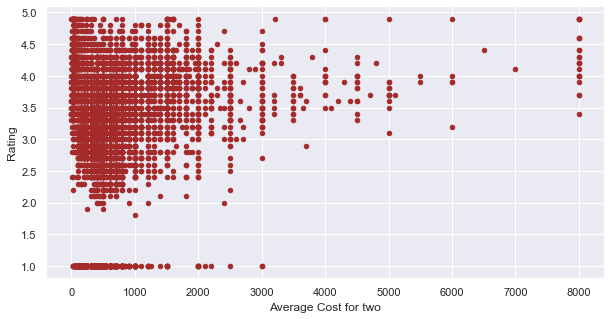

In [107]:
ConCols=['Longitude','Latitude','Votes','Average Cost for two']
CatCols=['Has Table booking', 'Has Online delivery', 'Price range']

#Scatter Chart
for Col in ConCols:
    data.plot.scatter(x=Col, y='Rating', figsize=(10,5),color='brown')

### Scatter charts interpretation

What should you look for in these scatter charts?

Trend. You should try to see if there is a visible trend or not. There could be three scenarios

* Increasing Trend: This means both variables are positively correlated. In simpler terms, they are directly proportional to each other, if one value increases, other also increases. This is good for ML!

* Decreasing Trend: This means both variables are negatively correlated. In simpler terms, they are inversely proportional to each other, if one value increases, other decreases. This is also good for ML!

* No Trend: You cannot see any clear increasing or decreasing trend. This means there is no correlation between the variables. Hence the predictor cannot be used for ML.

Based on this chart you can get a good idea about the predictor, if it will be useful or not. You confirm this by looking at the correlation value.

### Statistical Feature Selection (Continuous Vs Continuous) using Correlation value

* This value can be calculated only between two numeric columns
* Correlation between [-1,0) means inversely proportional, the scatter plot will show a downward trend
* Correlation between (0,1] means directly proportional, the scatter plot will show a upward trend
* Correlation near {0} means No relationship, the scatter plot will show no clear trend.
* If Correlation value between two variables is > 0.5 in magnitude, it indicates good relationship the sign does not matter
* We observe the correlations between Target variable and all other predictor variables(s) to check which columns/features/predictors are actually related to the target variable in question

In [108]:
ConColsWT=['Rating','Longitude','Latitude','Votes','Average Cost for two']

CorrelationData=data[ConColsWT].corr()
CorrelationData

,Rating,Longitude,Latitude,Votes,Average Cost for two
Rating,1.000000,-0.145930,-0.019806,0.385249,0.248981
Longitude,-0.145930,1.000000,0.043207,-0.101381,0.210272
Latitude,-0.019806,0.043207,1.000000,-0.019687,-0.064748
Votes,0.385249,-0.101381,-0.019687,1.000000,0.245662
Average Cost for two,0.248981,0.210272,-0.064748,0.245662,1.000000


In [109]:
CorrelationData['Rating'][abs(CorrelationData['Rating']>0.2)]

Rating                  1.000000
Votes                   0.385249
Average Cost for two    0.248981
Name: Rating, dtype: float64

**Final selected Continuous columns:**

'Votes', 'Average Cost for two'

### Relationship exploration: Categorical Vs Continuous -- Box Plots

When the target variable is Continuous and the predictor variable is Categorical we analyze the relation using Boxplots and measure the strength of relation using Anova test

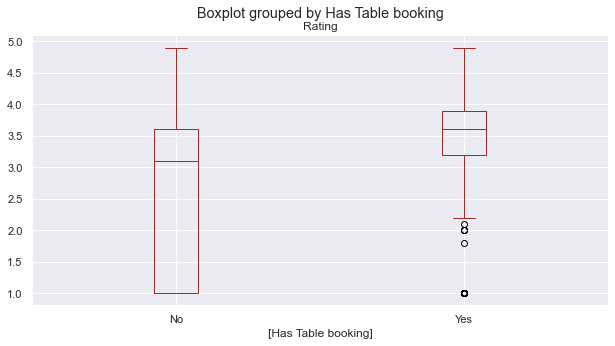

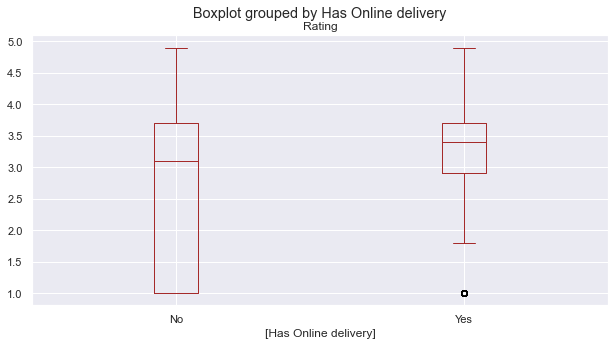

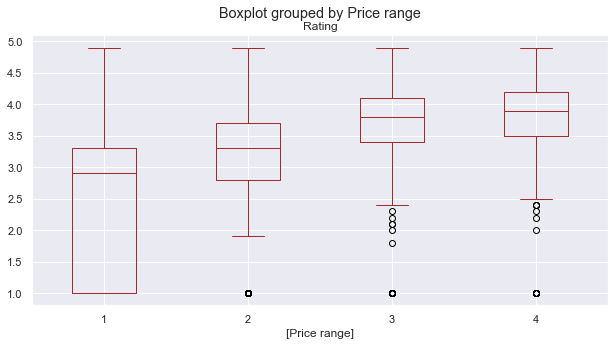

In [110]:
#Box Plot
for COL in CatCols:
    data.boxplot(column='Rating',by=[COL],figsize=(10,5),color='brown')

### Box-Plots interpretation

What should you look for in these box plots?

These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.

If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.

On the other hand if the distribution is different for each category(the boxes are not in same line!). It hints that these variables might be correlated with Rating.

In this data, all three categorical predictors looks correlated with the Target variable.

We confirm this by looking at the results of ANOVA test below

### Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test

Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

* Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Target variable is same for all the groups in the categorical Predictor variable)
* ANOVA Test result: Probability of H0 being true

In [111]:
#ANOVA

def FunAnova(inp, TargetV, CatCols):
    from scipy.stats import f_oneway
    
    SelectedPredictors=[]
    
    for Predictors in CatCols:
        CatG=inp.groupby(Predictors)[TargetV].apply(list)
        AnovaResult = f_oneway(*CatG)
        
        if (AnovaResult[1] < 0.05):
            print(Predictors, 'is Correlated with', TargetV,':',AnovaResult[1])
            SelectedPredictors.append(Predictors)
        else:
            print (Predictors, 'is not correlated with', TargetV,':',AnovaResult[1])
            
            return(SelectedPredictors)

In [112]:
FunAnova(inp=data, TargetV='Rating', CatCols=CatCols)

Has Table booking is Correlated with Rating : 3.9393041304297214e-82
Has Online delivery is Correlated with Rating : 1.6952587420575958e-92
Price range is Correlated with Rating : 0.0


The results of ANOVA confirm our visual analysis using box plots above.

All categorical variables are correlated with the Target variable. This is something we guessed by looking at the box plots!

Final selected Categorical columns:

'Has Table booking', 'Has Online delivery', 'Price range'

# Select final predictors for ML

Selecting final predictors for Machine Learning
Based on the above tests, selecting the final columns for machine learning

In [113]:
SelectedColumns=['Votes','Average Cost for two','Has Table booking', 'Has Online delivery', 'Price range']

# Selecting final columns
DataForML = data[SelectedColumns]
DataForML.head()

,Votes,Average Cost for two,Has Table booking,Has Online delivery,Price range
0,314,1100,Yes,No,3
1,591,1200,Yes,No,3
2,270,4000,Yes,No,4
3,365,1500,No,No,4
4,229,1500,Yes,No,4


# Data Pre-processing for Machine Learning

List of steps performed on predictor variables before data can be used for machine learning

* Converting each Ordinal Categorical columns to numeric
* Converting Binary nominal Categorical columns to numeric using 1/0 mapping
* Converting all other nominal categorical columns to numeric using pd.get_dummies()

In this data there is no Ordinal categorical variable.

In [114]:
### Converting the binary nominal variable to numeric using 1/0 mapping

DataForML['Has Table booking'].replace({'No':0,'Yes':1}, inplace=True)
DataForML['Has Online delivery'].replace({'No':0,'Yes':1}, inplace=True)
DataForML.head()

,Votes,Average Cost for two,Has Table booking,Has Online delivery,Price range
0,314,1100,1,0,3
1,591,1200,1,0,3
2,270,4000,1,0,4
3,365,1500,0,0,4
4,229,1500,1,0,4


In [115]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['Rating'] = data['Rating']

DataForML_Numeric.head()

,Votes,Average Cost for two,Has Table booking,Has Online delivery,Price range,Rating
0,314,1100,1,0,3,4.8
1,591,1200,1,0,3,4.5
2,270,4000,1,0,4,4.4
3,365,1500,0,0,4,4.9
4,229,1500,1,0,4,4.8


# Machine Learning: Splitting the data into Training and Testing sample

We dont use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [116]:
# Separate Target Variable and Predictor Variables
TargetVariable='Rating'
Predictors=['Votes','Average Cost for two','Has Table booking', 'Has Online delivery', 'Price range']

x=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=300)

# Linear Regression Model

In [117]:
RegModel=LinearRegression()

print(RegModel)

LREG=RegModel.fit(x_train, y_train)
Prediction=LREG.predict(x_test)

from sklearn import metrics

print('R2_value',metrics.r2_score(y_train, LREG.predict(x_train)))

LinearRegression()
R2_value 0.30917154849532325


In [118]:
# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=x_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(Prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())


   Rating  PredictedRating
0     3.5              3.0
1     3.1              2.0
2     4.0              4.0
3     2.5              3.0
4     1.0              2.0


In [119]:
TestingDataResults['APE']=100*((abs(
    TestingDataResults['Rating']-TestingDataResults['PredictedRating']))/TestingDataResults['Rating'])

MAPE=np.mean(TestingDataResults['APE'])
MedianAPE=np.median(TestingDataResults['APE'])

Accuracy = 100-MAPE
MedianAccuracy= 100-MedianAPE

print('Mean Accuracy is',Accuracy)
print('Median Accuracy is',MedianAccuracy)

Mean Accuracy is 55.158126071971694
Median Accuracy is 73.17073170731707


In [120]:
# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score (org, pred):
    MAPE=np.mean(100*(np.abs(org-pred))/org)
    return(100-MAPE)

custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, x , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [73.07128832 57.23634237 61.61405423 59.97790149 62.17608774 29.03036814
 48.84028175 51.06832392 40.27174351 53.61838933]

Final Average Accuracy of the model: 53.69


# Decision Tree

In [121]:
# Decision Trees (Multiple if-else statements!)
RegModel = DecisionTreeRegressor(max_depth=6,criterion='mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(x_train,y_train)
prediction=DT.predict(x_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(x_train)))

DecisionTreeRegressor(criterion='mse', max_depth=6)
R2 Value: 0.9090742718131103



##### Model Validation and Accuracy Calculations ##########
   Rating  PredictedRating
0     3.5              3.0
1     3.1              3.0
2     4.0              4.0
3     2.5              4.0
4     1.0              1.0


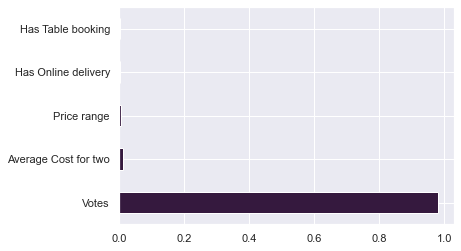

In [122]:
# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=x_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

In [123]:
# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Rating']-TestingDataResults['PredictedRating']))/TestingDataResults['Rating'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

Mean Accuracy on test data: 92.14224839767682
Median Accuracy on test data: 93.75


In [124]:
# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, x , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [90.79867804 92.40734815 92.36096482 92.60045486 92.95525464 95.05770184
 93.713076   93.81800852 92.90082114 91.96501727]

Final Average Accuracy of the model: 92.86


# Random Forest

RandomForestRegressor(criterion='mse', max_depth=2, n_estimators=400)
R2 Value: 0.8761415046028971


<AxesSubplot:>

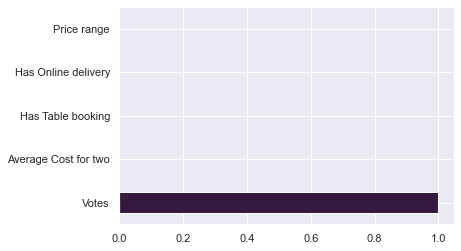

In [125]:
# Random Forest (Bagging of multiple Decision Trees)
RegModel = RandomForestRegressor(max_depth=2, n_estimators=400,criterion='mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(x_train,y_train)
prediction=RF.predict(x_test)

# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(x_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

In [126]:
# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=x_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

   Rating  PredictedRating
0     3.5              3.0
1     3.1              3.0
2     4.0              4.0
3     2.5              4.0
4     1.0              1.0


In [127]:
# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Rating']-TestingDataResults['PredictedRating']))/TestingDataResults['Rating'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

Mean Accuracy on test data: 91.6185168984346
Median Accuracy on test data: 93.75


In [128]:
# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, x , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [89.25918654 91.70599809 91.44636909 92.32845308 92.26866016 93.91454953
 92.57680571 92.86137674 91.80469152 90.07658816]

Final Average Accuracy of the model: 91.82


# Adaboost

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.04, n_estimators=500)
R2 Value: 0.8903131667186552


<AxesSubplot:>

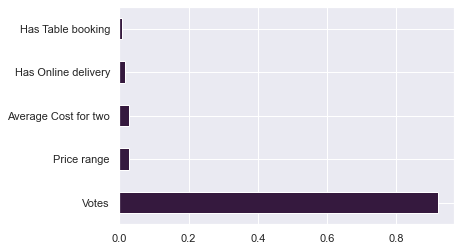

In [129]:
# Choosing Decision Tree with 1 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=3)
RegModel = AdaBoostRegressor(n_estimators=500, base_estimator=DTR ,learning_rate=0.04)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(x_train,y_train)
prediction=AB.predict(x_test)

# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(x_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

In [130]:
# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=x_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

   Rating  PredictedRating
0     3.5              3.0
1     3.1              3.0
2     4.0              4.0
3     2.5              4.0
4     1.0              1.0


In [131]:
# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Rating']-TestingDataResults['PredictedRating']))/TestingDataResults['Rating'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


Mean Accuracy on test data: 91.65347115380226
Median Accuracy on test data: 93.75


In [132]:
# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculationr
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, x , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [90.29611188 91.74515822 91.50335143 92.38253791 92.5194256  94.25459114
 92.89844806 92.95945624 92.11886293 90.89397164]

Final Average Accuracy of the model: 92.16


# KNN

In [133]:
# K-Nearest Neighbor(KNN)
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(x_train,y_train)
prediction=KNN.predict(x_test)

# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(x_train)))

KNeighborsRegressor(n_neighbors=3)
R2 Value: 0.9350654743752992


In [134]:
# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=x_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

   Rating  PredictedRating
0     3.5              3.0
1     3.1              3.0
2     4.0              4.0
3     2.5              4.0
4     1.0              1.0


In [135]:
# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Rating']-TestingDataResults['PredictedRating']))/TestingDataResults['Rating'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


Mean Accuracy on test data: 90.4806886699174
Median Accuracy on test data: 93.75


In [136]:
# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, x , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [88.60150963 91.03142207 90.88764353 91.43702867 92.14778863 94.26977339
 92.57218512 92.44177323 91.1827032  90.75307816]

Final Average Accuracy of the model: 91.53


# SVM

In [137]:
# Support Vector Machines(SVM)
RegModel = svm.SVR(C=5, kernel='rbf', degree=20, gamma=0.01)

# Printing all the parameters
print(RegModel)

# Creating the model on Training Data
SVM=RegModel.fit(x_train,y_train)
prediction=SVM.predict(x_test)

# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, SVM.predict(x_train)))


SVR(C=5, degree=20, gamma=0.01)
R2 Value: 0.9136830614653437


In [138]:
# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=x_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

   Rating  PredictedRating
0     3.5              3.0
1     3.1              3.0
2     4.0              4.0
3     2.5              4.0
4     1.0              1.0


In [139]:
# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Rating']-TestingDataResults['PredictedRating']))/TestingDataResults['Rating'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

Mean Accuracy on test data: 88.65169577945628
Median Accuracy on test data: 93.0232558139535


In [140]:
# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, x , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [87.6229555  85.97162807 87.74127716 88.09708476 88.55897782 86.89742362
 88.02251638 86.21139592 84.3492315  86.20664408]

Final Average Accuracy of the model: 86.97
